## Python version

## Import Libraries

In [0]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import preprocessing
from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.models import Sequential
import numpy as np

# Our Task
The purpose is to build a classifier that can distinguish between an image of a car vs. an image of a plane.
To do this, 80 images for each class are used for the training set, 20 images are used for the validation set, and then 15 images in total are used for the test set (or the unseen images which are used for gauging prediction accuracy). The image sets were collated independently using open-source images from the Pixabay and Unsplash websites.

## Car sample image
![](https://miro.medium.com/max/1020/0*qzQUpL-gOOSVKXbi.jpg)

## Plane sample image
![](https://miro.medium.com/max/1014/0*cr66x31FzqMfQuBf.jpg)

## CNN (Convolutional Neural Network) configuration

A sequential neural network with input shape (64, 64, 3) is configured:

In [0]:
classifier = Sequential()

# Convolution - extracting appropriate features from the input image.
# Non-Linearity (RELU) - replacing all negative pixel values in feature map by zero.

classifier.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3),
               activation='relu'))

# Pooling: reduces dimensionality of the feature maps but keeps the most important information.

classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Adding a second convolutional layer and flattening in order to arrange 3D volumes into a 1D vector.

classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Flatten())

# Fully connected layers: ensures connections to all activations in the previous layer.

classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dense(units=1, activation='sigmoid'))

## Compile and train
The classifier is then trained using the binary crossentropy loss function and adam optimizer.

## Classifier Training

In [39]:
classifier.compile(optimizer='adam', loss='binary_crossentropy',
                   metrics=['accuracy'])
from keras.preprocessing.image import ImageDataGenerator
train_imagedata = ImageDataGenerator(rescale=1. / 255, shear_range=0.2,
        zoom_range=0.2, horizontal_flip=True)
test_imagedata = ImageDataGenerator(rescale=1. / 255)
training_set = \
    train_imagedata.flow_from_directory('/content/drive/My Drive/11-machine-learning/convolutional-NN/data/training_set'
        , target_size=(64, 64), batch_size=32, class_mode='binary')
val_set = \
    test_imagedata.flow_from_directory('/content/drive/My Drive/11-machine-learning/convolutional-NN/data/val_set'
        , target_size=(64, 64), batch_size=32, class_mode='binary')
history=classifier.fit_generator(training_set, steps_per_epoch=30, epochs=30,
                         validation_data=val_set,
                         validation_steps=30)

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/30
30/30 [==============================] - 19s 627ms/step - loss: 0.4664 - accuracy: 0.8010 - val_loss: 0.4242 - val_accuracy: 0.7750
Epoch 2/30
30/30 [==============================] - 18s 608ms/step - loss: 0.2395 - accuracy: 0.9062 - val_loss: 0.4850 - val_accuracy: 0.8017
Epoch 3/30
30/30 [==============================] - 18s 614ms/step - loss: 0.1959 - accuracy: 0.9115 - val_loss: 0.4674 - val_accuracy: 0.7750
Epoch 4/30
30/30 [==============================] - 18s 606ms/step - loss: 0.1581 - accuracy: 0.9375 - val_loss: 0.5914 - val_accuracy: 0.8200
Epoch 5/30
30/30 [==============================] - 19s 622ms/step - loss: 0.1049 - accuracy: 0.9521 - val_loss: 0.5962 - val_accuracy: 0.8250
Epoch 6/30
30/30 [==============================] - 18s 609ms/step - loss: 0.0803 - accuracy: 0.9729 - val_loss: 0.7167 - val_accuracy: 0.8500
Epoch 7/30
30/30 [==============================] - 18s 616ms

As we can see below and above, we have achieved a 90\% accuracy range. However, the model loss is also increasing as we increase the number of epochs.

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


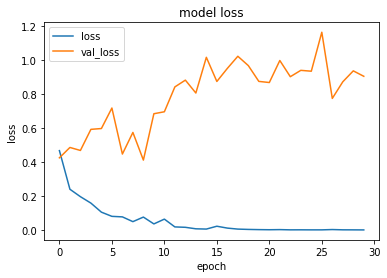

In [40]:
# Plot training and validation loss/accuracy
import matplotlib.pyplot as plt
print(history.history.keys())
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

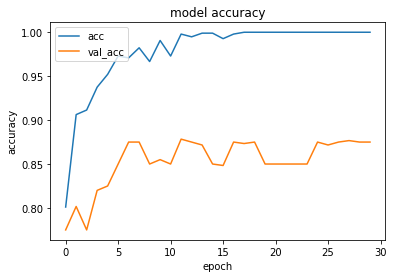

In [41]:
# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

This suggests an issue with overfitting — given that a relatively small sample size was used to train the model. This will lead to a situation whereby the model performs strongly on classifying training data, but poorly on classifying unseen data.

# Overfitting fixes: Data Augmentation

## Setting up a data augmentation configuration via ImageDataGenerator

In [0]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [0]:
import os, shutil
train_cars_dir = '/content/drive/My Drive/11-machine-learning/convolutional-NN/data/training_set/cars'

In [0]:
fnames = [os.path.join(train_cars_dir, fname) for
         fname in os.listdir(train_cars_dir)]

In [45]:
fnames

['/content/drive/My Drive/11-machine-learning/convolutional-NN/data/training_set/cars/car-race-438467__340.jpg',
 '/content/drive/My Drive/11-machine-learning/convolutional-NN/data/training_set/cars/car-1093927__340.jpg',
 '/content/drive/My Drive/11-machine-learning/convolutional-NN/data/training_set/cars/auto-2179220__340.jpg',
 '/content/drive/My Drive/11-machine-learning/convolutional-NN/data/training_set/cars/automobile-176989__340.jpg',
 '/content/drive/My Drive/11-machine-learning/convolutional-NN/data/training_set/cars/auto-1399087__340.jpg',
 '/content/drive/My Drive/11-machine-learning/convolutional-NN/data/training_set/cars/auto-racing-558089__340.jpg',
 '/content/drive/My Drive/11-machine-learning/convolutional-NN/data/training_set/cars/amg-1880381__340.jpg',
 '/content/drive/My Drive/11-machine-learning/convolutional-NN/data/training_set/cars/car-2617392__340.jpg',
 '/content/drive/My Drive/11-machine-learning/convolutional-NN/data/training_set/cars/classic-car-1646996__34

In [0]:
img_path = fnames[3]

In [0]:
img = image.load_img(img_path, target_size=(64, 64))

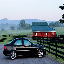

In [48]:
img

In [49]:
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
x

array([[[[235., 243., 254.],
         [234., 242., 253.],
         [235., 243., 254.],
         ...,
         [226., 240., 253.],
         [227., 239., 251.],
         [226., 238., 250.]],

        [[234., 242., 253.],
         [233., 241., 252.],
         [233., 241., 252.],
         ...,
         [226., 240., 253.],
         [227., 239., 251.],
         [226., 238., 250.]],

        [[233., 241., 252.],
         [233., 241., 252.],
         [232., 240., 251.],
         ...,
         [226., 238., 250.],
         [226., 238., 250.],
         [226., 238., 250.]],

        ...,

        [[101., 115., 142.],
         [ 98., 110., 136.],
         [ 92., 104., 130.],
         ...,
         [ 71., 100.,  44.],
         [ 87., 129.,  47.],
         [ 91., 131.,  68.]],

        [[105., 120., 149.],
         [114., 128., 155.],
         [101., 115., 144.],
         ...,
         [141., 144., 151.],
         [ 98., 109.,  93.],
         [ 91., 114.,  68.]],

        [[ 98., 113., 142.],
       

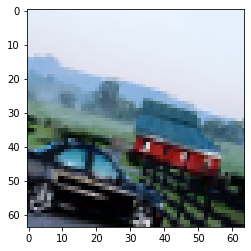

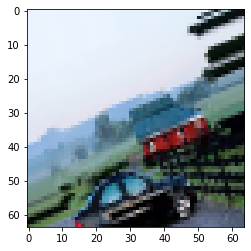

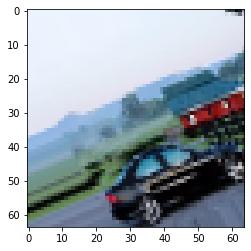

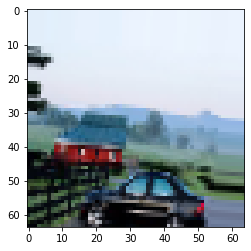

In [50]:
# Remixing existing information

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

### Trainable attribute set to False in order to freeze the convolutional base - this is done to prevent weights from updating during training

##Preventing overfitting: Using a pretrained network
In a situation where not enough images exist for an effective sample size, one option is to use a pretrained network. In this example, VGG16 is used; which comes prepackaged with Keras.
Essentially, this pretrained network is one that will previously have been trained on a large image database, and thus the weights of the VGG16 network are appropriately optimized for classification purposes. In this regard, VGG16 can be used in conjunction with the existing training data to improve the classification of the model.
Using classification weights trained on the imagenet database, the model can be trained. Additionally, note that conv_base.trainable is set to False, in order to freeze the weights; i.e. prevent them from updating during training.
Here is a summary of the model:

In [0]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(64,64,3))

conv_base.trainable=False

In [67]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 64, 64, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

The Sequential model is defined, with Dropout introduced to further reduce overfitting, and the training and validation directories are defined.

In [0]:
model = tf.keras.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [0]:
train_dir = '/content/drive/My Drive/11-machine-learning/convolutional-NN/data/training_set'
validation_dir = '/content/drive/My Drive/11-machine-learning/convolutional-NN/data/val_set'

In [0]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

The train and validation generators are defined, and the model is trained over 30 epochs:

In [64]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [65]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=30,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=30)

Epoch 1/30
30/30 [==============================] - 76s 3s/step - loss: 0.4804 - acc: 0.7844 - val_loss: 0.5273 - val_acc: 0.7250
Epoch 2/30
30/30 [==============================] - 76s 3s/step - loss: 0.3343 - acc: 0.8656 - val_loss: 0.4751 - val_acc: 0.7033
Epoch 3/30
30/30 [==============================] - 76s 3s/step - loss: 0.2948 - acc: 0.8833 - val_loss: 0.4201 - val_acc: 0.7000
Epoch 4/30
30/30 [==============================] - 76s 3s/step - loss: 0.2427 - acc: 0.9021 - val_loss: 0.3806 - val_acc: 0.7783
Epoch 5/30
30/30 [==============================] - 76s 3s/step - loss: 0.2206 - acc: 0.9073 - val_loss: 0.3722 - val_acc: 0.7500
Epoch 6/30
30/30 [==============================] - 76s 3s/step - loss: 0.1930 - acc: 0.9292 - val_loss: 0.3664 - val_acc: 0.8217
Epoch 7/30
30/30 [==============================] - 76s 3s/step - loss: 0.2113 - acc: 0.9083 - val_loss: 0.3549 - val_acc: 0.8250
Epoch 8/30
30/30 [==============================] - 76s 3s/step - loss: 0.1940 - acc: 0.92

Let’s take a look at the model loss and accuracy:


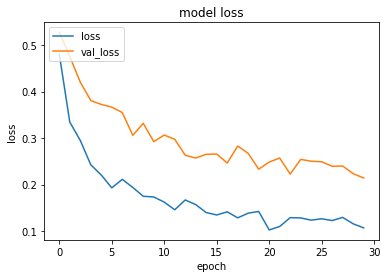

In [68]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()

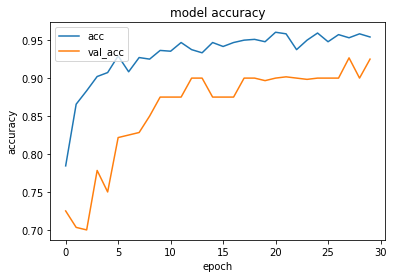

In [69]:
# Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc='upper left')
plt.show()

We can see that the validation accuracy has remained more or less the same, while the model loss has improved greatly. This indicates that the model is now less likely to overfit than previously.

# Generate predictions
##Testing against unseen data
The next step is to now test the prediction accuracy of the model against unseen data or test data (i.e. images that have not been used in either the training or validation sets).
In the data/test folder, 15 unseen images (separate from the training and validation sets) are used for prediction purposes by the developed model. With cars having a label of 0 and planes having a label of 1, the prediction for each image is yielded.

Here are two examples:
##Prediction for plane image

In [71]:
# car = 0, plane = 1

# image = plane

test_image = \
    image.load_img('/content/drive/My Drive/11-machine-learning/convolutional-NN/data/test/photo-1430402393301-f3b159a7a65a.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

array([[1.]], dtype=float32)

![](https://github.com/marivifs-teaching/python-class/blob/master/lectures/11-machine-learning/convolutional-NN/data/test/photo-1430402393301-f3b159a7a65a.jpg?raw=true)

##Prediction for car image

In [72]:
# car = 0, plane = 1

# image = car

test_image = \
    image.load_img('/content/drive/My Drive/11-machine-learning/convolutional-NN/data/test/photo-1542362567-b07e54358753.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

array([[0.]], dtype=float32)

![](https://github.com/marivifs-teaching/python-class/blob/master/lectures/11-machine-learning/convolutional-NN/data/test/photo-1542362567-b07e54358753.jpg?raw=true)


In [0]:
# car = 0, plane = 1

# image = car

test_image = \
    image.load_img('/content/drive/My Drive/11-machine-learning/convolutional-NN/data/test/photo-1541443131876-44b03de101c5.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

In [0]:
# car = 0, plane = 1

# image = car

test_image = \
    image.load_img('/content/drive/My Drive/11-machine-learning/convolutional-NN/data/test/photo-1532974297617-c0f05fe48bff.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

In [0]:
# car = 0, plane = 1

# image = car

test_image = \
    image.load_img('/content/drive/My Drive/11-machine-learning/convolutional-NN/data/test/photo-1520340356584-f9917d1eea6f.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

In [0]:
# car = 0, plane = 1

# image = car

test_image = \
    image.load_img('/content/drive/My Drive/11-machine-learning/convolutional-NN/data/test/photo-1519641471654-76ce0107ad1b.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

In [0]:
# car = 0, plane = 1

# image = plane

test_image = \
    image.load_img('/content/drive/My Drive/11-machine-learning/convolutional-NN/data/test/photo-1512289984044-071903207f5e.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

In [0]:
# car = 0, plane = 1

# image = car

test_image = \
    image.load_img('/content/drive/My Drive/11-machine-learning/convolutional-NN/data/test/photo-1511919884226-fd3cad34687c.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

In [0]:
# car = 0, plane = 1

# image = car

test_image = \
    image.load_img('/content/drive/My Drive/11-machine-learning/convolutional-NN/data/test/photo-1502877338535-766e1452684a.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

In [0]:
# car = 0, plane = 1

# image = plane

test_image = \
    image.load_img('/content/drive/My Drive/11-machine-learning/convolutional-NN/data/test/photo-1498423281417-af8aff4579dc.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

In [0]:
# car = 0, plane = 1

# image = car

test_image = \
    image.load_img('/content/drive/My Drive/11-machine-learning/convolutional-NN/data/test/photo-1494905998402-395d579af36f.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

In [0]:
# car = 0, plane = 1

# image = car

test_image = \
    image.load_img('/content/drive/My Drive/11-machine-learning/convolutional-NN/data/test/photo-1489824904134-891ab64532f1.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

In [0]:
# car = 0, plane = 1

# image = plane

test_image = \
    image.load_img('/content/drive/My Drive/11-machine-learning/convolutional-NN/data/test/photo-1483375801503-374c5f660610.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

In [0]:
# car = 0, plane = 1

# image = plane

test_image = \
    image.load_img('/content/drive/My Drive/11-machine-learning/convolutional-NN/data/test/photo-1475088092121-b7d3cd6e1482.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result

In [0]:
# car = 0, plane = 1

# image = plane

test_image = \
    image.load_img('/content/drive/My Drive/11-machine-learning/convolutional-NN/data/test/photo-1473862170180-84427c485aca.jpg'
                   , target_size=(64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
result